## Rider Sentiment Analysis


# After webscraping the data, we will perform sentiment analysis on the reviews of the riders.
#### The data is collected from various sources including:
- https://www.reddit.com/r/transit/comments/1bt9yng/the_chicago_l_is_an_american_treasure/
- https://www.reddit.com/r/cta/comments/1dwa1w5/how_bad_is_the_cta_really_compared_to_other_cities/
- https://www.tripadvisor.com/ShowUserReviews-g35805-d549354-r491931481-Chicago_Transit_Authority_CTA-Chicago_Illinois.html
- https://www.yelp.com/biz/chicago-transit-authority-chicago-6
#### Employee reviews from:
https://www.indeed.com/cmp/Chicago-Transit-Authority/reviews




In [9]:
import pandas as pd
import nltk
import re
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests

In [10]:

# Webscraping the data from reddit

def get_reddit_comments(url):
    try:
        response = requests.get(url, headers={'User-Agent': 'Chrome/58.0.3029.110'})
        response.raise_for_status()
        data = response.json()
        
        if len(data) < 2 or 'data' not in data[1] or 'children' not in data[1]['data']:
            print(f"Unexpected JSON structure from {url}")
            return []

        comments_body1 = [
            comment['data']['body']
            for comment in data[1]['data']['children']
            if 'body' in comment['data']
        ]
        return comments_body1
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e} | URL: {url}")
    except ValueError as e:
        print(f"Invalid JSON response from {url}: {e}")
    except KeyError as e:
        print(f"Missing key in JSON from {url}: {e}")
    return []

# Define the URLS
reddit_urls = [
    'https://www.reddit.com/r/AskChicago/comments/1bd1qvv/anxiety_and_public_trans/.json',
    'https://www.reddit.com/r/cta/comments/1fawrep/cta_safety/.json',
    'https://www.reddit.com/r/chicago/comments/1fa12z8/when_does_ctas_contract_with_action_k9_security/.json',
    'https://www.reddit.com/r/cta/comments/1hyip6m/security_guards_at_clark_and_lake/.json',
    'https://www.reddit.com/r/cta/comments/1jyg948/security_on_redline_train_cars/.json',
    'https://www.reddit.com/r/cta/comments/1etdbub/the_cta_has_71_million_to_spend_on_private/.json',
    'https://www.reddit.com/r/chicago/comments/1601ue0/what_is_even_the_point_of_the_cta_security/.json',
    'https://www.reddit.com/r/cta/comments/1ir9sn2/what_happened_to_the_k9_security_folks_on_the/.json',
    'https://www.reddit.com/r/chicago/comments/15ok7w0/any_comments_about_cta_security_guards/.json',
    'https://www.reddit.com/r/cta/comments/1d5sxem/cops_actually_patrolling_cta/.json',
    'https://www.reddit.com/r/chicago/comments/187syls/intercon_cta_blue_line_security/.json',
    'https://www.reddit.com/r/SameGrassButGreener/comments/1dzy7ry/chicago_cta_safety_vs_nyc_train/.json',
    'https://www.reddit.com/r/cta/comments/1hzl3ro/feeling_unsafe_on_blue_line/.json',
    'https://www.reddit.com/r/chicago/comments/1acn0an/how_safe_is_the_cta/.json',    
    'https://www.reddit.com/r/chicago/comments/1dushal/private_security_on_the_cta/.json',
    'https://www.reddit.com/r/cta/comments/1iao3va/yes_we_need_police_on_the_trains_and_i_would/.json',
    'https://www.reddit.com/r/cta/comments/1fc5fhp/safety_petition/.json',
    'https://www.reddit.com/r/cta/comments/1famme7/ctas_high_violent_crime_rate_keeps_away_whats/.json',
    'https://www.reddit.com/r/cta/comments/1jguwbi/clean_up_your_act_cta/.json',
    'https://www.reddit.com/r/chicago/comments/1g2a4vx/at_board_meeting_cta_is_piloting_digital_bus_stop/.json',
    'https://www.reddit.com/r/cta/comments/1adbz9r/policesecurity_at_stations/.json',
    'https://www.reddit.com/r/AskChicago/comments/1f3smyl/cta_stops_safety_question_roosevelt_vs_monroe/.json'
]
# join get_reddit_comments(rdt_url) and get_reddit_comments(rdt_url2)
comments_body = []
for url in reddit_urls:
    comments_body.extend(get_reddit_comments(url))



print(len(comments_body))
# Store the post & comments in a list

# Convert the list to a dataframe
reddit_df = pd.DataFrame(comments_body, columns=['comment'])

# display(reddit_df)

500


In [11]:


from nltk.corpus import stopwords

# Do some sentiment analysis on the comments with nltk
nltk.download('all')
stop_words = set(stopwords.words('english'))

# Do the same for the other sources
def preprocess_text_light(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r"\n", " ", text)  # remove newlines
    text = re.sub(r"[^a-zA-Z0-9.,!?'\"]+", ' ', text)  # keep punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return ' '.join(words).strip()

reddit_df['processed_comment'] = reddit_df['comment'].apply(preprocess_text_light)
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['compound'] > 0.05 else 0 if scores['compound'] < -0.05 else None
    return sentiment

# data clean up
reddit_df = reddit_df[~reddit_df['comment'].str.lower().isin(['[deleted]', '[removed]'])]
reddit_df = reddit_df[reddit_df['comment'].str.split().str.len() > 2]

reddit_df['sentiment'] = reddit_df['processed_comment'].apply(get_sentiment)
display(reddit_df)

# Drop rows with None in sentiment
reddit_df_clean = reddit_df.dropna(subset=['sentiment'])





[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[

,comment,processed_comment,sentiment
0,Just remind yourself that the trains only go i...,remind trains go two directions. like driving ...,0.0
1,In short a few things:\n\n1) Leave early to al...,short things 1 leave early allow room mistakes...,1.0
2,Try the transit when you don’t really have any...,try transit really anywhere be. way stressful ...,0.0
3,Google maps. It will tell you what stops to ta...,"google maps. tell stops take, trains supposidl...",1.0
4,"Practice makes perfect, you’ll learn your rout...","practice makes perfect, learn routes feel home...",1.0
...,...,...,...
493,"Hi, I am a bot. I think you might be asking ab...","hi, bot. think might asking public transit chi...",1.0
495,Roosevelt is my home station. Right around the...,roosevelt home station. right around station j...,1.0
497,Roosevelt feels fine during the weekday and ru...,roosevelt feels fine weekday rush hours. would...,0.0
498,I lived off of the Roosevelt stop for three ye...,lived roosevelt stop three years. handful ques...,0.0


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(reddit_df_clean['sentiment'], reddit_df_clean['sentiment']))
# print(classification_report(reddit_df['sentiment'], reddit_df['sentiment']))  

[[164   0]
 [  0 221]]


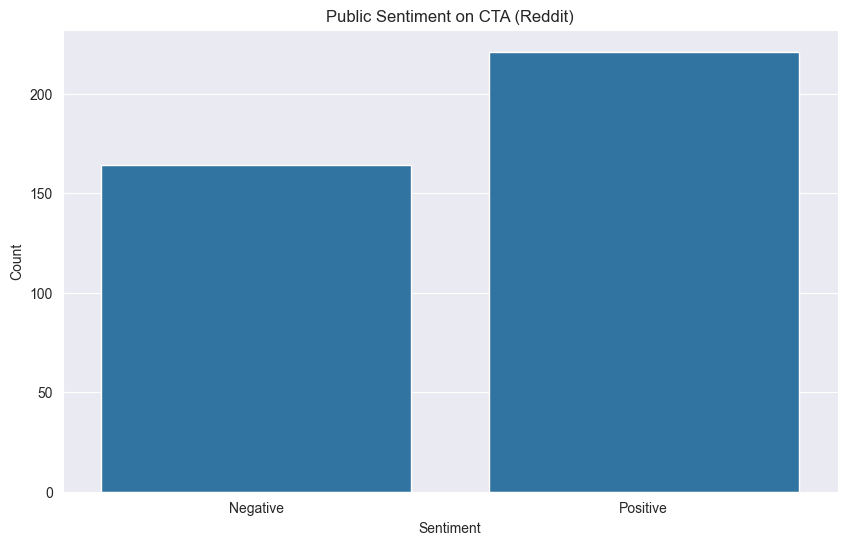

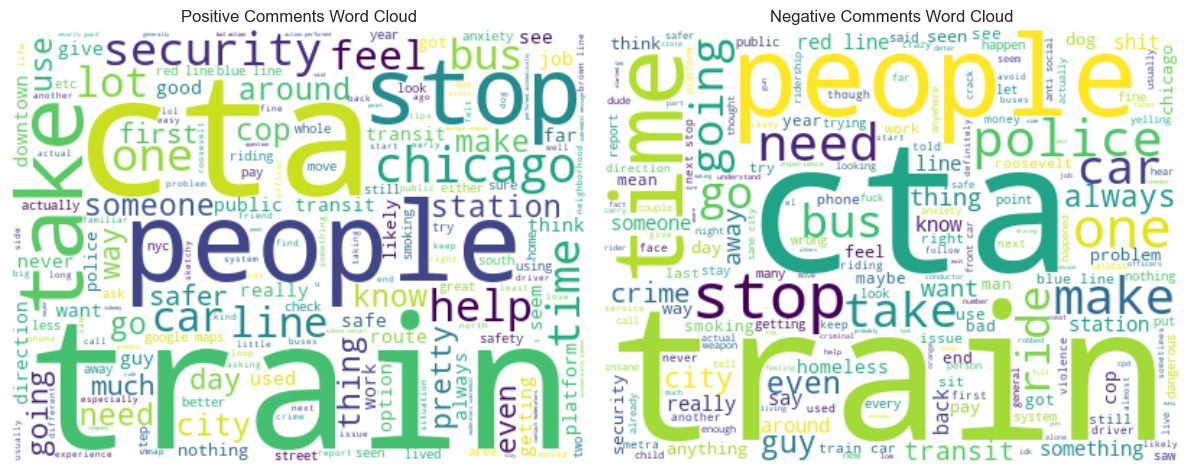

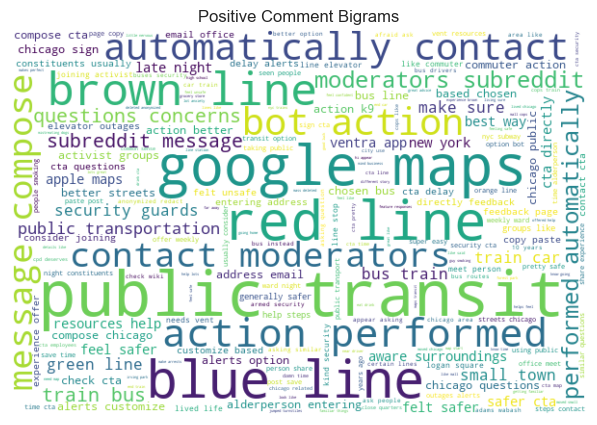

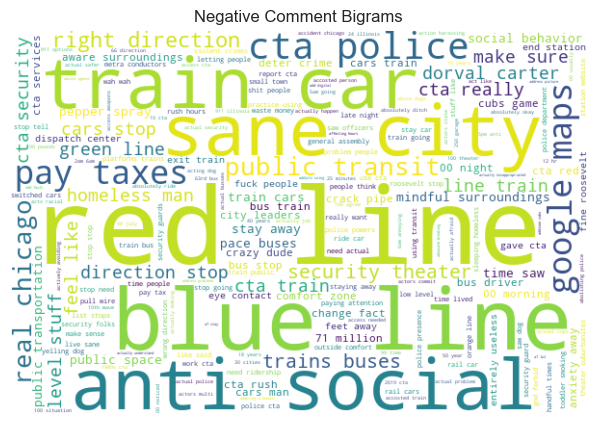

Top Positive Words: [('get', 72), ('cta', 66), ('like', 55), ('train', 54), ('people', 44), ('line', 43), ('security', 40), ('take', 35), ('transit', 33), ('chicago', 32)]
Top Negative Words: [('cta', 54), ('people', 49), ('train', 45), ('get', 44), ('line', 30), ('stop', 29), ('would', 26), ('time', 25), ('police', 25), ('like', 24)]


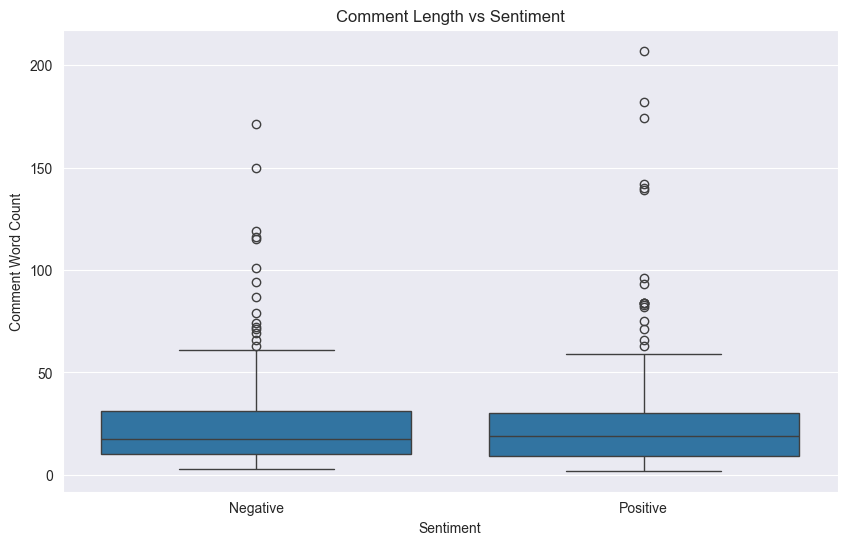

,comment,processed_comment,sentiment,comment_length
0,Just remind yourself that the trains only go i...,remind trains go two directions. like driving ...,0.0,36
1,In short a few things:\n\n1) Leave early to al...,short things 1 leave early allow room mistakes...,1.0,52
2,Try the transit when you don’t really have any...,try transit really anywhere be. way stressful ...,0.0,16
3,Google maps. It will tell you what stops to ta...,"google maps. tell stops take, trains supposidl...",1.0,75
4,"Practice makes perfect, you’ll learn your rout...","practice makes perfect, learn routes feel home...",1.0,83
...,...,...,...,...
493,"Hi, I am a bot. I think you might be asking ab...","hi, bot. think might asking public transit chi...",1.0,58
495,Roosevelt is my home station. Right around the...,roosevelt home station. right around station j...,1.0,30
497,Roosevelt feels fine during the weekday and ru...,roosevelt feels fine weekday rush hours. would...,0.0,10
498,I lived off of the Roosevelt stop for three ye...,lived roosevelt stop three years. handful ques...,0.0,11


In [16]:

# graph the sentiment
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

sns.countplot(x='sentiment', data=reddit_df)
plt.title('Public Sentiment on CTA (Reddit)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

from wordcloud import WordCloud

positive_comments = ' '.join(reddit_df[reddit_df['sentiment'] == 1]['processed_comment'])
negative_comments = ' '.join(reddit_df[reddit_df['sentiment'] == 0]['processed_comment'])

plt.figure(figsize=(12, 6))

# Positive comments word cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=300, background_color='white').generate(positive_comments)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Comments Word Cloud')
plt.axis('off')

# Negative comments word cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=300, background_color='white').generate(negative_comments)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Comments Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

from sklearn.feature_extraction.text import CountVectorizer

def generate_bigram_wordcloud(text, title):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit([text])
    bigrams = vectorizer.get_feature_names_out()
    counts = vectorizer.transform([text]).toarray().sum(axis=0)
    bigram_freq = dict(zip(bigrams, counts))
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(bigram_freq)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate bigram word clouds
generate_bigram_wordcloud(positive_comments, 'Positive Comment Bigrams')
generate_bigram_wordcloud(negative_comments, 'Negative Comment Bigrams')

from collections import Counter

positive_words = Counter(' '.join(reddit_df[reddit_df['sentiment'] == 1]['processed_comment']).split())
negative_words = Counter(' '.join(reddit_df[reddit_df['sentiment'] == 0]['processed_comment']).split())

print("Top Positive Words:", positive_words.most_common(10))
print("Top Negative Words:", negative_words.most_common(10))

# Display full table of sentiment and comments

reddit_df[['comment', 'sentiment']].to_csv('reddit_sentiment.csv', index=False)

reddit_df['comment_length'] = reddit_df['processed_comment'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment', y='comment_length', data=reddit_df)
plt.title('Comment Length vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Comment Word Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

reddit_df
